In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [10]:
train_df = pd.read_csv('all/train.csv')
#test_df = pd.read_csv('../input/test.csv')

In [11]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
test_df.head()

<h2>**Check Target Values**</h2>

In [12]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
train_df['Cabin'].isnull().sum() / len(train_df)

0.7710437710437711

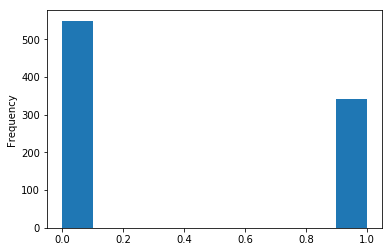

In [17]:
train_df['Survived'].plot.hist()

<h2>**Check NaN values**</h2>

In [18]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
def get_missing_columns(df):
    mis_vals = df.isnull().sum()
    mis_vals_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_vals, mis_vals_percent], axis=1)
    mis_val_ren_table = mis_val_table.rename(columns = {0: 'number of missing values', 
                                                       1: '% of total values'})
    mis_val_ren_table = mis_val_ren_table[mis_val_ren_table.iloc[:, 1]!=0].sort_values('% of total values', ascending=False)
    
    return mis_val_ren_table

In [ ]:
get_missing_columns(train_df)

In [ ]:
#Add columns to see whether the persons were cabin or not
train_df['has Cabin Number'] = train_df['Cabin'].notnull().apply(lambda x: int(x))
train_df.head()

In [ ]:
train_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace=True, axis=1)
train_df.head()

In [ ]:
X_train = train_df[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'has Cabin Number']]
y_train = train_df[['Survived']]

<h2>Proccessing Train Data</h2>

In [ ]:
#One hot value
X_train_one_hot = pd.get_dummies(X_train, columns=['Pclass','Sex','Embarked', 'has Cabin Number'])
X_train_one_hot

In [ ]:
#Replace NAN values of Age column with average values
average_age = X_train_one_hot['Age'].mean()
X_train_one_hot['Age'].fillna(average_age, inplace=True)
X_train_one_hot

In [ ]:
#Normalize the column values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train_scaled = sc.fit_transform(X_train_one_hot)
X_train_scaled

In [ ]:
scaled_table_train = pd.DataFrame(data=X_train_scaled, columns=X_train_one_hot.columns)
scaled_table_train

<h2>Look deeper into the data</h2>

In [ ]:
scaled_table_with_y = pd.concat([y_train, scaled_table_train], axis=1)
scaled_table_with_y.head()

In [ ]:
corr = scaled_table_with_y.corr()
corr

In [ ]:
#function which remove less important columns
def remove_columns(df, columns):
    df.drop(columns, axis=1, inplace=True)
    return df

In [ ]:
scaled_table_train = remove_columns(scaled_table_train, ['Age', 'SibSp'])
scaled_table_train

<h2>Fit the model using the test data</h2>

In [ ]:
#一旦SVMはおやすみ
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [ ]:
'''import lightgbm as lgb
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(scaled_table_train, y_train, test_size=0.2, random_state=42)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset()
params = {'objective':'crossentropy'}
gbm = lgb.train(params, train_set=scaled_table_train)'''

In [ ]:
#Tune Hyperparameters to imporve the model
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]
params = {'C':Cs, 'gamma':gammas}
gridsearch = GridSearchCV(model, params, scoring='accuracy', cv=5)
gridsearch.fit(scaled_table_train, y_train)
gridsearch.best_params_

In [ ]:
best_model = SVC(C=0.1,kernel='linear', gamma=0.001)
best_model.fit(scaled_table_train, y_train)

<h2>Processing to test data</h2>

In [ ]:
get_missing_columns(test_df)

In [ ]:
#Add columns to see whether the persons were cabin or not
test_df['has Cabin Number'] = test_df['Cabin'].notnull().apply(lambda x: int(x))
test_df.head()

In [ ]:
result_df = test_df[['PassengerId']]
result_df.head()

In [ ]:
test_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace=True, axis=1)
test_df.head()

In [ ]:
X_test = test_df[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'has Cabin Number']]

In [ ]:
#One hot value
X_test_one_hot = pd.get_dummies(X_test, columns=['Pclass','Sex','Embarked', 'has Cabin Number'])
X_test_one_hot

In [ ]:
#Replace NAN values of Age column with average values
average_age = X_train_one_hot['Age'].mean()
X_test_one_hot['Age'].fillna(average_age, inplace=True)
X_test_one_hot

In [ ]:
#これを追加した。以下は一旦runしない
#X_test_one_hot['Age'].dropna(inplace=True)
#X_test_one_hot

In [ ]:
X_test_scaled = sc.fit_transform(X_test_one_hot)
X_test_scaled

In [ ]:
scaled_table_test = pd.DataFrame(data=X_test_scaled, columns=X_test_one_hot.columns)

In [ ]:
#Replace NaN Fare value with average value
ave_fare = scaled_table_test['Fare'].mean()
scaled_table_test['Fare'].fillna(ave_fare, inplace=True)

In [ ]:
#Replace less important columns
scaled_table_test = remove_columns(scaled_table_test, ['Age', 'SibSp'])
scaled_table_test

In [ ]:
#SVMはお休み
predict = best_model.predict(scaled_table_test)

In [ ]:
print(scaled_table_test.columns)
print(scaled_table_train.columns)

In [ ]:
result_df['Survived'] = predict

In [ ]:
result_df

In [ ]:
result_df.to_csv('submission.csv', index=False)